## pandas 02


## 4.Indexing & Slicing

### 4-01 Series 

#### 4-01-01 숫자 인덱스를 갖는 Series
- Numpy Array와 동일하게 대괄호([ ])를 사용하여 특정 요소에 접근 
- 위치가 index가 아니라 '**행 인덱스를 사용**'한다는 점에 유의
- -1로 가장 마지막 요소에 접근 불가 (-1 인덱스는 없기 때문)

In [61]:
# 숫자 인덱스를 갖는 Series 생성
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [62]:
# indexing을 사용하여 0 인덱스에 대한 value 가져오기
s[0]

1

In [63]:
# slicing을 사용하여 1~2 인덱스에 대한 value 가져오기
s[1:3]

1    2
2    3
dtype: int64

In [64]:
# -1 인덱스를 사용하면 Error를 볼 수 있음
s[-1]

# s[s.index[-1]]   #-> s[4] 와 같은 의미 

KeyError: -1

In [55]:
# s.index[-1]

4

#### 4-01-02 문자열 인덱스를 갖는 Series
- Series의 경우 문자열 인덱스를 가질 수 있기 때문에 이름(문자열)을 통해서도 개별
데이터에 접근 가능
- 모든 행에 대해 인덱스가 문자로 지정된 경우에는 위치(숫자)를 동시에 사용 가능
- 문자 인덱스를 이용하여 슬라이싱하는 경우 마지막 값을 포함함

In [56]:
# 문자열 인덱스를 갖는 Series 생성
s = pd.Series([1, 2, 3, 4, 5],
              index=['A','B','C','D','E'])
s

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [57]:
# Series s에서 인덱스가 'A'인 것에 대한 indexing => 정수 반환
s['A']

1

In [58]:
# Series s에서 인덱스가 'B', 'C', 'D' 인 것에 대한 Slicing => Series 반환
# 문자열 인덱스를 사용하여 slicing 하여볼 것
s['B':'D']


B    2
C    3
D    4
dtype: int64

In [59]:
# 정수 index를 사용하여 'B', 'C', 'D' 인 것에 대한 Slicing
s[:3]

A    1
B    2
C    3
dtype: int64

In [60]:
# 정수 index를 사용할 수 있으므로 -1 인덱스 가능!
s[-1]

5

### 4-02 DataFrame
- DataFrame에서 Indexing과 Slicing은 다르게 동작함
- Indexing : 열 단위 선택
- Slicing : 행 단위 선택

#### 4-02-01 Indexing, Slicing

In [66]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [ ]:
# DataFrame df에서 column의 이름이 'X1'인 것에 대해 indexing
df['X1']

A    1
B    4
C    7
Name: X1, dtype: int64

In [ ]:
# DataFrame df에서 index의 이름이 'B'인 것부터 마지막까지 slicing
df['B':]

,X1,X2,X3
B,4,5,6
C,7,8,9


In [68]:
# df['B':] 처럼 열을 df['X1':]하는건 안되나요? 
df.loc[:, 'X1':]

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


#### 4-02-02 조건, 팬시 인덱싱

- Boolean DataFrame인 경우 True 값을 가지는 위치의 행 인덱스와 열 인덱스를 기
반으로 선택
- False 값을 가지는 위치는 NaN으로 설정

In [67]:
df % 2 == 0

,X1,X2,X3
A,False,True,False
B,True,False,True
C,False,True,False


In [ ]:
# Boolean DataFrame
# df의 값이 짝수인 것은 그대로, 홀수인 것은  Nan
df[df % 2 == 0]

,X1,X2,X3
A,NaN,2.0,NaN
B,4.0,NaN,6.0
C,NaN,8.0,NaN


- Boolean List 또는 Boolean Array라면 True 값을 가지는 위치를 기반으로 선택
- Boolean Series인 경우 True 값을 가지는 인덱스를 기반으로 선택

In [ ]:
# Boolean List를 사용한 인덱싱 - True 값을 가지는 위치를 기반으로 선택
blist = [True, False, False]
df[blist]

,X1,X2,X3
A,1,2,3


In [ ]:
# Boolean Series를 사용한 인덱싱 - True 값을 가지는 인덱스를 기반으로 선택
# df['X1']의 값이 짝수 index에 인 것에 대해 가져오기
df[df['X1'] %2 ==0]

,X1,X2,X3
B,4,5,6


In [72]:
type(df['X1'] %2 ==0)
df['X1'] %2 ==0

A    False
B     True
C    False
Name: X1, dtype: bool

In [82]:
df['X1'] % 2 ==0

A    False
B     True
C    False
Name: X1, dtype: bool

In [84]:
type(df['X1'])

pandas.core.series.Series

In [73]:
# index를 ['C','B','A']로 갖는 Series 생성
bs = pd.Series([True, False, False], index=['C','B','A'])
bs

C     True
B    False
A    False
dtype: bool

In [74]:
# bs를 사용한 indexing 확인
df[bs]

<ipython-input-74-2e07d04563c2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[bs]


,X1,X2,X3
C,7,8,9


In [75]:
# array를 사용하여 가져올 여러 개의 열을 지정
# DataFrame df에 대해 array를 사용하여 'X1', 'X3' 열 가져오기
df[['X1', 'X3']]

,X1,X3
A,1,3
B,4,6
C,7,9


In [81]:
df.columns == 'X1'
df.loc[:, df.columns == 'X1']
# df[[True, False,False]]

,X1,X2,X3
A,1,2,3


In [86]:
df[df.columns[df['X1'] % 2 == 0]]  ### 안됨 

,X2
A,2
B,5
C,8


In [85]:
df.columns[df['X1'] % 2 == 0] 

Index(['X2'], dtype='object')

In [88]:
df.columns

Index(['X1', 'X2', 'X3'], dtype='object')

In [87]:
df['X1'] % 2 == 0

A    False
B     True
C    False
Name: X1, dtype: bool

In [89]:
df[df.columns[[True, False, False]]]

,X1
A,1
B,4
C,7


## 5.Indexer
- 기본 indexing, slicing보다 indexer 사용을 권장함
- indexer는 loc, iloc, at, iat이 있음
    - loc, at 인덱서 : 이름 기반 인덱싱
    - iloc, iat 인덱서 : 위치 기반 인덱싱
    - at, iat 인덱서 : 한 개의 값만 반환
- dataframe.인덱서[행 인덱스, 열 인덱스] 와 같이 사용    

### 5-01 loc 인덱서
- loc 인덱서의 행 또는 열 인덱스
    - 위치(정수)가 아닌 이름(문자열)
    - 이름(문자열)의 리스트나 슬라이싱
    - boolean 리스트, 1차원 배열, 시리즈 (DataFrame은 불가)
- loc 인덱서 사용 방법
    - dataframe.loc[행 인덱스, 열 인덱스]
    - 예) df.loc[:, 'A':'C']    

In [95]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [96]:
# DataFrame df에서 'A' 행, 모든 열에 대해 추출 -> Series 반환
df.loc['A', :]   #df.loc['A']

X1    1
X2    2
X3    3
Name: A, dtype: int64

In [97]:
df.loc[:'A', :] 

,X1,X2,X3
A,1,2,3


In [100]:
# loc을 사용하여 DataFrame df에서 모든 행, 'X1' 열에 대해 추출 -> Series 반환
df.loc[:, 'X1']
# type(df.loc[:, 'X1'])

A    1
B    4
C    7
Name: X1, dtype: int64

In [101]:
# loc을 사용하여 DataFrame df에서 ['A', 'C']행, ['X1', 'X2']열에 대해 추출
df.loc[['A','C'], ['X1','X2']]

,X1,X2
A,1,2
C,7,8


In [104]:
# loc을 사용하여 DataFrame df에서 행은 'X1'열의 값이 짝수인 것, 열은 ['X1', 'X3']에 대해 추출
df.loc[df.X1 %2 ==0, ['X1','X3']]

,X1,X3
B,4,6


In [102]:
df.X1   #df['X1']

A    1
B    4
C    7
Name: X1, dtype: int64

In [103]:
df.X1 %2 ==0

A    False
B     True
C    False
Name: X1, dtype: bool

### 5-02 iloc 인덱서
- iloc 인덱서의 행 또는 열 인덱스 형식
   - 위치(정수)
   - 위치(정수)의 리스트나 슬라이싱
   - boolean 리스트, 1차원 배열 (시리즈 불가)
- iloc 인덱서 사용 방법
   - dataframe.iloc[행 인덱스, 열 인덱스]
   - 예) df.iloc[:, 1:3]

In [ ]:
# iloc을 사용하여 DataFrame df에서 0번 행, 모든 열에 대해 추출 => Series
df.iloc[0]    #df.iloc[0,:]

X1    1
X2    2
X3    3
Name: A, dtype: int64

In [105]:
# iloc을 사용하여 DataFrame df에서 모든 행, 0번 열에 대해 추출 => Series
df.iloc[:, 0]

A    1
B    4
C    7
Name: X1, dtype: int64

In [106]:
df.iloc[:, 0:1]

,X1
A,1
B,4
C,7


In [107]:
# iloc을 사용하여 DataFrame df에서 [0, 2]번 행, [0, 1]번 열에 대해 추출 
df.iloc[[0,2], [0,1]]

,X1,X2
A,1,2
C,7,8


In [108]:
# iloc을 사용하여 DataFrame df에서 행의 경우 [False, True, False] boolean list사용
# [0, -1] 열에 대해 추출 

blist =  [False, True, False]
df.iloc[blist, [0, -1]]

,X1,X3
B,4,6


### 5-03 at, iat의 성능
- at, iat 인덱서는 loc, iloc 인덱서와 비슷하지만 하나의 값만 가져옴
- 빠른 인덱싱 속도가 요구되는 경우 사용
- loc, iloc보다 at, iat이 소모 시간이 적음

In [ ]:
%timeit df.loc["A", "X1"]

The slowest run took 11.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.07 µs per loop


In [ ]:
%timeit df.at["A", "X1"]

The slowest run took 18.00 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.03 µs per loop


In [ ]:
%timeit df.iloc[0, 0]

The slowest run took 8.91 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 19.2 µs per loop


In [ ]:
%timeit df.iat[0, 0]

The slowest run took 7.52 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 18.4 µs per loop


## 6.데이터 조작

### 6-01 데이터 조회
- head(N)
    - Series 또는 DataFrame에서 사용 가능
    - 첫 행부터 아래로 N개(기본 값 5)의 데이터를 조회
- tail(N)
    - Series 또는 DataFrame에서 사용 가능
    - 마지막 행부터 위로 N개(기본 값 5)의 데이터를 조회


In [109]:
df = pd.DataFrame([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
                  index=['A', 'B', 'C'], columns=['X1', 'X2', 'X3'])
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [114]:
# DataFrame df에서 첫 행부터 1개의 데이터 조회
df.head(1)   #기본5개 

,X1,X2,X3
A,1,2,3


In [118]:
# DataFrame df에서 마지막 행부터 1개의 데이터 조회
df.tail(1)   #기본 5개 

,X1,X2,X3
C,7,8,9


### 6-02 데이터 빈도 조회
- value_counts(sort, ascending, normalize)
    - 값의 개수를 계산하여 **내림차순**으로 정렬 후 결과 반환
    - sort를 False로 지정하면 결과를 정렬하지 않음
    - ascending을 True로 지정하면 오름차순, False로 지정하면 내림차순 정렬
    - normalize를 True로 지정하면 비율 반환

In [119]:
s = pd.Series(['A', 'B', 'A', 'C', 'A'])
# Series s의 값 개수를 계산하여 내림차순으로 정렬 후 결과 반환
s.value_counts()

A    3
C    1
B    1
dtype: int64

In [120]:
s = pd.Series(['A', 'B', 'A', 'C', 'A'])
# Series s의 값 개수를 계산하여 결과를 비율로 반환 (normalize=True 사용)
s.value_counts(normalize=True)

A    0.6
C    0.2
B    0.2
dtype: float64

In [123]:
s.unique()     #유니크값 - 범주형데이터

array(['A', 'B', 'C'], dtype=object)

In [128]:
# s.value_counts('A')
# df.value_counts('X1')
s.value_counts()['A']

3

In [129]:
s.value_counts()

A    3
C    1
B    1
dtype: int64

### 6-03 데이터 정렬


sort_index(axis=0 or 1, ascending=True or False)
- 행(aixs=0) 또는 열(axis=1) 인덱스를 오름차순(ascending=True) 또는 내림차순
(ascending=False)로 정렬 가능
- DataFrame에서만 열(axis=1) 지정 가능

In [130]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [131]:
# 행 인덱스 기준 내림차순 정렬
df.sort_index(ascending=False)

,X1,X2,X3
C,7,8,9
B,4,5,6
A,1,2,3


In [ ]:
# 열 인덱스 기준 내림차순 정렬
df.sort_index(ascending=False,axis=1)

,X3,X2,X1
A,3,2,1
B,6,5,4
C,9,8,7


sort_values(by, ascending=True or False)
- 특정 컬럼을 기준으로 데이터를 정렬
- DataFrame에서는정렬 기준(by) 지정 필수
- 정렬 기준과 방식을 [ ]로 묶어서 여러 개 설정 가능

In [132]:
s = pd.Series([1,2,3,4,5], index=list("ABCDE"))
s

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [133]:
# Series s를 내림차순 정렬
s.sort_values(ascending=False)

E    5
D    4
C    3
B    2
A    1
dtype: int64

In [136]:
# DataFrame df를 정렬 기준을 'X3'열로 하여 내림차순 정렬
df.sort_values(by='X3', ascending=False)
df.sort_values(by='X3', ascending=False).head(3)

,X1,X2,X3
C,7,8,9
B,4,5,6
A,1,2,3


### 6-04 데이터 타입 변경


#### 6-04-01 astype(str or dict)
- DataFrame의 전체 데이터 유형을 변환하거나 특정 컬럼(Series)만 변경 가능
- 전체 데이터 유형을 변환하기 위해서는 변환하고자 하는 데이터 유형을 문자열로 지정
- 특정 컬럼의 데이터 유형만 변경하고 싶은 경우 딕셔너리 형태로 지정
    - { ‘컬럼명’ : ‘데이터 유형‘}

In [137]:
df.dtypes

X1    int64
X2    int64
X3    int64
dtype: object

In [138]:
# DataFrame df의 dtype을 'float'로 변경
df = df.astype('float')
df

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [140]:
df.dtypes

X1    float64
X2    float64
X3    float64
dtype: object

In [141]:
# DataFrame df의 'X1', 'X3'열에 대한 dtype을 'float'로 변경
# dict 객체를 사용함
df.astype({'X1':'float', 'X3':'float'})

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


#### 6-04-02 pd.to_numeric
- pd.to_numeric(1d array or series, errors='ignore', 'raise', 'coerce')
- astype을 이용하여 숫자형으로변경하고자하는 경우 에러가 발생할 수 있음
    - 숫자형으로 변경이 불가능한 데이터가 존재하는 경우 발생하며 주로 문자열에서 많이
발생함
- to_numeric 함수를 이용하면 에러 유형에 따라 변환 방법을 지정 가능
    - erros를 ignore로 설정하는 경우 에러가 발생하지 않고 변경이 안됨
    - erros를 raise로 설정하는 경우 에러를 발생시킴 (기본 값)
    - erros를 coerce로 설정하는 경우 에러가 발생한 데이터는 NaN으로 변환

In [142]:
# 문자열 값을 갖는 Series 생성
str_series = pd.Series(['1', '2', '3', '4', 'a'])
str_series

0    1
1    2
2    3
3    4
4    a
dtype: object

In [143]:
# 숫자로 변경할 수 없는 'a'가 있어 Error 발생
pd.to_numeric(str_series, errors='raise') # Error 

ValueError: Unable to parse string "a" at position 4

In [144]:
# 숫자로 변경할 수 없는 'a'가 있어 numeric으로 변환하지 않음
pd.to_numeric(str_series, errors='ignore')

0    1
1    2
2    3
3    4
4    a
dtype: object

In [145]:
# 숫자로 변경할 수 없는 'a'에 대해 NaN 으로 대체하고 float64로 변경
pd.to_numeric(str_series, errors='coerce')

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

#### 6-04-03 pd.to_datetime
- pd.to_datetime(dataframe)
   - DataFrame의 컬럼명이 ‘year’, ‘month’, ‘day’, ‘hour’, ‘minute’, ‘second’, ‘ms’, ‘us’,
‘ns’과 같다면 날짜 형식 데이터 반환
- pd.to_datetime(1d array or series, format)
   - 문자열 또는 숫자로 지정된 데이터를 날짜 형식으로 변환
   - format을 지정하면 변환 속도가 빨라짐


In [153]:
import pandas as pd
# 특정 열이름(year, month, day)을 갖는 DataFrame 생성
date = pd.DataFrame({
    'year' : [2020, 2019, 2018],
    'month': [1, 1, 1],
    'day' : [1, 1, 1]
})
date

,year,month,day
0,2020,1,1
1,2019,1,1
2,2018,1,1


In [162]:
# 특정 열이름(year, month, day)를 갖는 DataFrame을 사용하여 
# dtype이 datatime인 Series 생성
pd.to_datetime(date)



0   2020-01-01
1   2019-01-01
2   2018-01-01
dtype: datetime64[ns]

In [4]:
# 날짜 형식의 문자열을 item으로 하는 list를 사용하여 
# dtype이 datatime인 DatetimeIndex 생성
datelist = ['2020-01-01', '2019-01-01', '2018-01-01']
pd.to_datetime(datelist, format="%Y-%m-%d")

DatetimeIndex(['2020-01-01', '2019-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [148]:
# 날짜 형식의 문자열을 item으로 하는 list를 사용하여 
# format 지정하여, dtype이 datatime인 DatetimeIndex 생성 
date = ['01012020', '01012019', '01012018']
#pd.to_datetime(date)  # 자동으로 날짜 형식 인지가 안됨
pd.to_datetime(date, format="%m%d%Y")  # 형식을 알려줌

DatetimeIndex(['2020-01-01', '2019-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

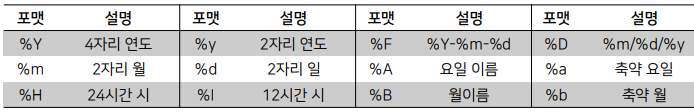

In [3]:
import pandas as pd 
df = pd.DataFrame({'Birth':['2019-01-01 09:10:00',
                            '2019-06-30 21:20:50',
                            '2019-07-20 23:30:59']})
df['Birth'] = pd.to_datetime(df['Birth'], format='%Y-%m-%d %H:%M:%S'
                             , errors='raise')
# df['Birth'].dt.date  
df['Birth'].dt.strftime('%y/%m/%d %p %I:%M:%S')

0    19/01/01 AM 09:10:00
1    19/06/30 PM 09:20:50
2    19/07/20 PM 11:30:59
Name: Birth, dtype: object

In [10]:
# format='%Y-%m-%d %I:%M:%S',
import pandas as pd
# pd.to_datetime('2019-11-26 오후 2:40:14', format='%Y-%m-%d %p %H:%M:%S')



import datetime
D=datetime.date(2013,2,18)
D.strftime('%Y %m %d')
D.strftime('%y/%m/%d %p %I:%M:%S') #시, 분, 초에 대한 정보는 없기때문에 '0'으로 반환됨
D.strftime('%y-%m-%d %p %I:%M:%S') 

'13-02-18 AM 12:00:00'

In [12]:
pd.to_datetime('2019-11-26 PM 2:40:14', format='%Y-%m-%d %p %I:%M:%S')


Timestamp('2019-11-26 14:40:14')

#### 6-06-04 날짜 범위 생성
- pd.date_range(start, end, periods, freq)
   - 특정 날짜/시간 범위의 데이터 생성 가능
   - periods(데이터의 개수), freq(생성 주기)

In [149]:
# date_range(start, periods)를 사용하여 
# 2020년 1월 1일 ~ 10일까지의 날짜를 갖는 dtype이 datatime인 DatetimeIndex 생성
pd.date_range('20200101', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [150]:
# date_range(start, end, freq='S')를 사용하여 
# 2020-01-01 00:00:00  ~ 2020-12-31 00:00:00 까지의 데이터를 갖는 
# dtype이 datatime인 DatetimeIndex 생성

index = pd.date_range('2020-01-01', '2020-12-31', freq='S')
index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               ...
               '2020-12-30 23:59:51', '2020-12-30 23:59:52',
               '2020-12-30 23:59:53', '2020-12-30 23:59:54',
               '2020-12-30 23:59:55', '2020-12-30 23:59:56',
               '2020-12-30 23:59:57', '2020-12-30 23:59:58',
               '2020-12-30 23:59:59', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=31536001, freq='S')

In [151]:
pd.date_range('2020-01-01', '2020-12-31', freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

### 6-05 데이터 삭제
- drop(labels, axis, inplace)
   - labels로 지정된 행(axis=0) 또는 열(axis=1)이 삭제된 결과 반환
   - 삭제 대상이 여러 개인 경우 행 또는 **열 인덱스를 [ ]로 묶어서 설정**
   - 결과를 반환하지 않고 원본에 바로 적용하고자 하는 경우 inplace를 True로 설정

In [ ]:
df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [163]:
# DataFrame에서 행 인덱스가 'A'인 행 삭제 -> 행기준 axis=0 
df.drop('A')

,X1,X2,X3
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [164]:
# DataFrame에서 열 인덱스가 ['X1', 'X3']인 열 삭제 
df.drop(['X1', 'X3'], axis=1)

,X2
A,2.0
B,5.0
C,8.0


In [165]:
del df['X1']    #열삭제 

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [ ]:
import numpy as np 
np.cor

### 6-06 데이터 구간별 범주화
- pd.cut(x, bins, right, labels, …)
- 연속 데이터를 구간별 범주화

In [2]:
import pandas as pd
ages = [0, 15, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [0, 15, 25, 35, 60, 100]
labels = ['어린이', '청년', '장년', '중년', '노년']
cuts = pd.cut(ages, bins, right=False, labels=labels)
cuts

['어린이', '청년', '어린이', '청년', '청년', ..., '노년', '청년', '중년', '장년', NaN]
Length: 12
Categories (5, object): ['어린이' < '청년' < '장년' < '중년' < '노년']

In [176]:
import pandas as pd
ages = [0, 15, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [0, 15, 25, 35, 60, 100]
labels = ['어린이', '청년', '장년', '중년', '노년']
cuts = pd.cut(ages, bins,  right=True, labels=labels, include_lowest=True)
cuts

['어린이', '어린이', '어린이', '청년', '청년', ..., '노년', '청년', '중년', '장년', '노년']
Length: 12
Categories (5, object): ['어린이' < '청년' < '장년' < '중년' < '노년']

## 7.통계함수(Statistical Functions)
- Pandas는 배열의 주어진 요소로 부터 최소, 최대, 백분위수, 표준 편차, 분산 등을 찾
는데 유용한 통계 함수가 존재
- 통계 함수는 배열에서 요소별로 작동하며axis 옵션을 통해 연산 방향을 지정할 수 있
음
    - axis이 0으로 지정 된 경우 행과 행의 연산 결과 반환 (기본 값)
    - axis이 1로 지정 된 경우 열과 열의 연산 결과 반환
- min, max, mean, median, quantile, std, var, corrcoef, argmin, argmax,
cumsum, cumprod 등

In [179]:
df

,X1,X2,X3
A,1.0,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [180]:
# DataFrame df의 행과 행의 합(sum)결과 반환
df.sum()

X1    12.0
X2    15.0
X3    18.0
dtype: float64

In [ ]:
# DataFrame df의 열과 열의 합(sum)결과 반환
df.sum(axis=1)

A     6.0
B    15.0
C    24.0
dtype: float64

In [ ]:
# DataFrame df의 열별 통계 값 출력
# count, mean, std, min, 25%, 50%, 75%, max
df.describe()

,X1,X2,X3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [181]:
#### NaN 있는 경우 
df.loc['A', 'X1'] =  np.NaN
df

,X1,X2,X3
A,NaN,2.0,3.0
B,4.0,5.0,6.0
C,7.0,8.0,9.0


In [184]:
df.sum(axis=0, skipna=False)   #기본은 NaN은 스킵 

X1     NaN
X2    15.0
X3    18.0
dtype: float64

### 연습문제 
- 아래 데이터프레임에 대한 특정 통계 함수를 이용하여 연산하였을때 
- 수행 결과가 오른쪽과 같이 나오도록 코드를 작성하세요. 

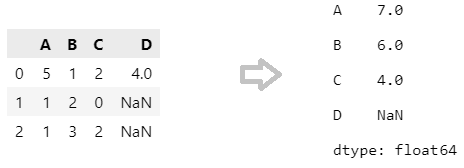


In [4]:
import numpy as np 
import pandas as pd 

df0 = pd.DataFrame([[5,1,2,4.0], [1,2,0, np.nan], [1,3,2, np.nan]], columns=list('ABCD'))
df0

,A,B,C,D
0,5,1,2,4.0
1,1,2,0,NaN
2,1,3,2,NaN


In [6]:
# code here 
df0.sum(axis=0, skipna=False)

A    7.0
B    6.0
C    4.0
D    NaN
dtype: float64